# Importación de librerías

In [88]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import KernelPCA

# Importación del conjunto de datos

In [89]:
data = pd.read_csv("./datos.csv", sep=',', index_col=0)

data.head(5)

,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,...,landmark_29_z,landmark_30_x,landmark_30_y,landmark_30_z,landmark_31_x,landmark_31_y,landmark_31_z,landmark_32_x,landmark_32_y,landmark_32_z
frame,,,,,,,,,,,,,,,,,,,,,
1.0,sentarse,0.496513,0.391797,-0.228675,0.497693,0.387753,-0.222847,0.498450,0.388126,-0.222853,...,0.012102,0.486108,0.583033,-0.033983,0.511950,0.588696,-0.015748,0.490280,0.591626,-0.065950
2.0,sentarse,0.496397,0.391697,-0.200978,0.497610,0.387340,-0.193793,0.498411,0.387566,-0.193820,...,-0.005365,0.486081,0.583744,-0.052926,0.511741,0.589572,-0.041306,0.489741,0.592514,-0.092338
3.0,sentarse,0.496019,0.390957,-0.172315,0.497260,0.386117,-0.166023,0.498138,0.386188,-0.166053,...,-0.024103,0.486075,0.584625,-0.048225,0.510231,0.589807,-0.066917,0.487988,0.594700,-0.090789
4.0,sentarse,0.495835,0.389214,-0.132569,0.497103,0.384293,-0.126539,0.498056,0.384327,-0.126565,...,-0.032235,0.486169,0.584586,-0.052476,0.510114,0.589376,-0.074378,0.488209,0.594773,-0.095094
5.0,sentarse,0.495808,0.388118,-0.100940,0.497033,0.383358,-0.095321,0.498029,0.383323,-0.095341,...,-0.065377,0.487016,0.584660,-0.074366,0.506574,0.589372,-0.108042,0.488177,0.594889,-0.116433


## Normalización

In [90]:
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia de StandardScaler
scaler = MinMaxScaler()

# Seleccionar las columnas que deseas normalizar (excluyendo las columnas no numéricas si es necesario)
columns_to_normalize = data.select_dtypes(include=['float64', 'int64']).columns

# Resetear el índice del DataFrame para asegurar que los índices sean únicos
data_reset = data.reset_index(drop=True)

# Normalizar los datos
normalized_data = scaler.fit_transform(data_reset[columns_to_normalize])

# Crear un nuevo DataFrame con los datos normalizados
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)

# Si deseas mantener las columnas no numéricas, puedes concatenarlas con el DataFrame normalizado
result_df_normalized = pd.concat([data_reset.drop(columns=columns_to_normalize), normalized_df], axis=1)

# Mostrar el DataFrame normalizado
data = result_df_normalized

data

,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,...,landmark_29_z,landmark_30_x,landmark_30_y,landmark_30_z,landmark_31_x,landmark_31_y,landmark_31_z,landmark_32_x,landmark_32_y,landmark_32_z
0,sentarse,0.482265,0.571583,0.607671,0.482083,0.576577,0.634434,0.480209,0.577376,0.634373,...,0.362290,0.427376,0.161754,0.299677,0.597373,0.143042,0.462413,0.408908,0.197607,0.403315
1,sentarse,0.481997,0.571419,0.621151,0.481882,0.575915,0.649571,0.480113,0.576474,0.649499,...,0.352262,0.427288,0.163296,0.288529,0.596891,0.145082,0.449002,0.407761,0.199656,0.389608
2,sentarse,0.481125,0.570200,0.635101,0.481029,0.573951,0.664040,0.479434,0.574254,0.663966,...,0.341504,0.427269,0.165207,0.291296,0.593411,0.145628,0.435564,0.404035,0.204700,0.390413
3,sentarse,0.480700,0.567333,0.654446,0.480647,0.571023,0.684611,0.479230,0.571258,0.684540,...,0.336835,0.427572,0.165122,0.288794,0.593142,0.144626,0.431649,0.404506,0.204869,0.388177
4,sentarse,0.480638,0.565531,0.669840,0.480477,0.569521,0.700876,0.479164,0.569641,0.700808,...,0.317808,0.430279,0.165282,0.275911,0.584985,0.144617,0.413985,0.404438,0.205136,0.377092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8662,sentarse,0.563018,0.586025,0.458023,0.598416,0.580823,0.486912,0.615748,0.581186,0.486895,...,0.280226,0.401721,0.642438,0.256381,0.859891,0.783235,0.289051,0.220097,0.798856,0.285541
8663,sentarse,0.562942,0.586714,0.464757,0.598365,0.581201,0.495024,0.615524,0.581546,0.494994,...,0.278884,0.401687,0.642437,0.254814,0.859976,0.782018,0.288925,0.221232,0.798194,0.285307
8664,sentarse,0.563135,0.587657,0.450823,0.598255,0.581793,0.479448,0.615465,0.582063,0.479426,...,0.252646,0.401926,0.642590,0.224636,0.859925,0.781619,0.255866,0.222740,0.798123,0.249000
8665,sentarse,0.563141,0.588791,0.455209,0.598169,0.582586,0.482557,0.615384,0.582791,0.482573,...,0.245056,0.402457,0.642903,0.212193,0.859887,0.780902,0.247814,0.223955,0.797056,0.236167


# EDA

## Cálculo de la varianza acumulada por componentes

Varianza explicada por cada componente principal:
Componente 1: 0.3816
Componente 2: 0.2049
Componente 3: 0.1207
Componente 4: 0.1112
Componente 5: 0.0620
Componente 6: 0.0406
Componente 7: 0.0275
Componente 8: 0.0123
Componente 9: 0.0080
Componente 10: 0.0073
Componente 11: 0.0057
Componente 12: 0.0047
Componente 13: 0.0029
Componente 14: 0.0020
Componente 15: 0.0017
Componente 16: 0.0011


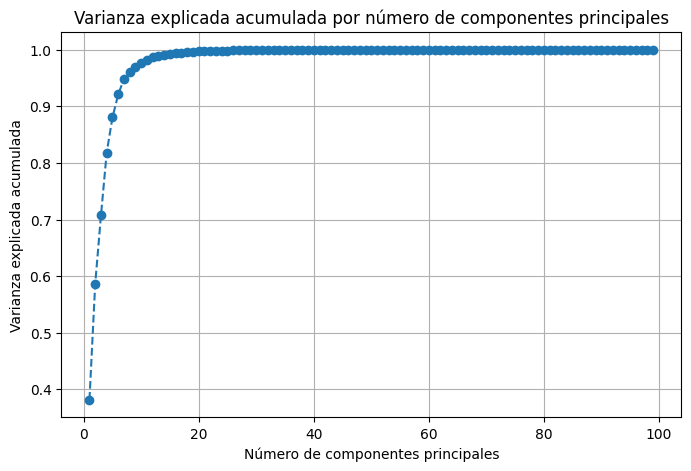

In [91]:
#Calcular la varianza explicada acumulada
data_2=data.drop('label', axis=1)
X = StandardScaler().fit_transform(data_2)
pca = PCA()  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

## Reducción de dimensionalidad y gráfica

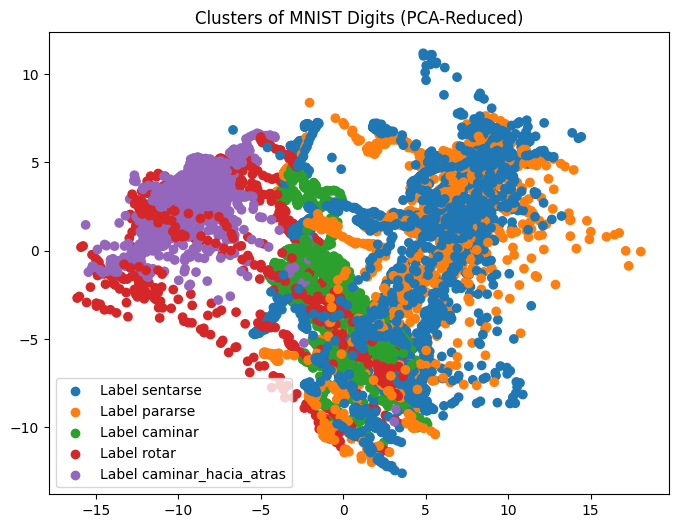

In [92]:
labels = data['label']

data_2=data.drop('label', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=8)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters of MNIST Digits (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()

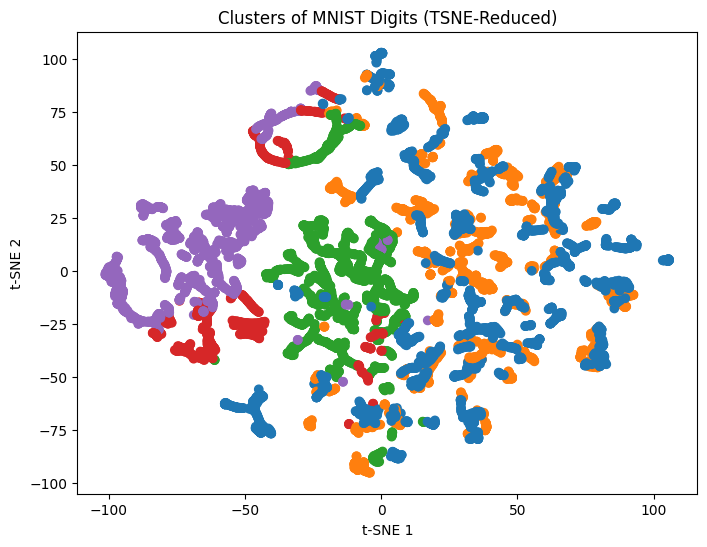

In [93]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, init='pca')
tsne_features = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=colors)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title("Clusters of MNIST Digits (TSNE-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

## Prueba con Kmeans sin etiquetas

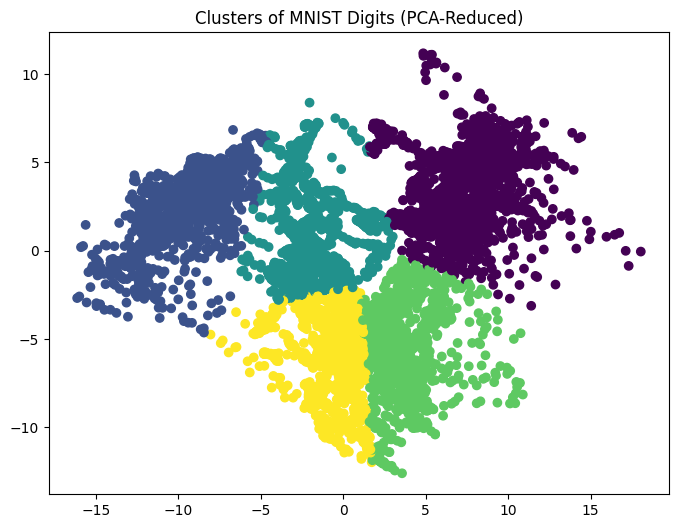

In [94]:
labels = data['label']

data_2=data.drop('label', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=0,n_init=2)  # 10 clusters for 10 digits
cluster_labels = kmeans.fit_predict(reduced_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Clusters of MNIST Digits (PCA-Reduced)")
plt.show()

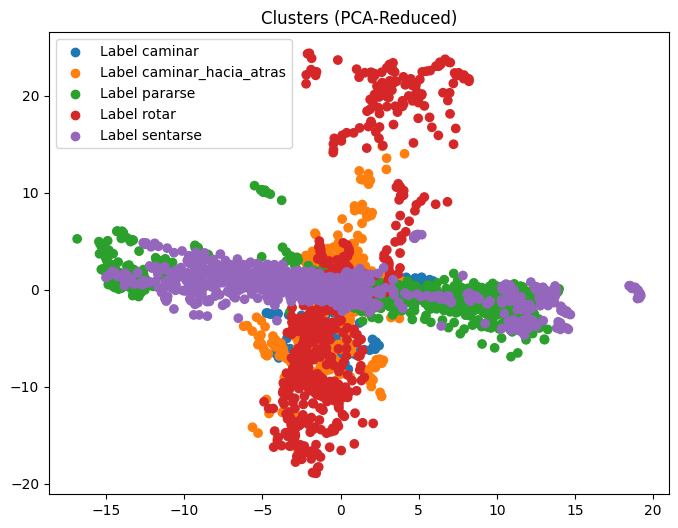

In [95]:
labels = result_df['label']

data_2=result_df.drop('label', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=20)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()


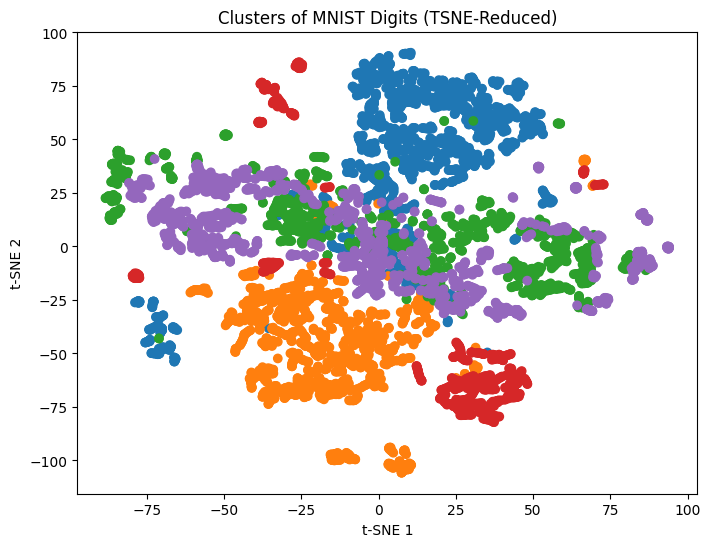

In [96]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, init='pca')
tsne_features = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=colors)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title("Clusters of MNIST Digits (TSNE-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

## Cálculo de deltas

In [97]:
import pandas as pd

# Suponiendo que df es tu DataFrame original
result_data = []

df = data.copy()

# Agrupar por el label
grouped = df.groupby('label')

for label, group in grouped:
    # Tomar grupos de 5 frames de forma continua
    for i in range(len(group) - 15):  # -5 para asegurarnos de que haya al menos 6 frames
        # Tomar un grupo de 6 frames
        frame_group = group.iloc[i:i + 16]

        # Crear un diccionario para almacenar los datos de este grupo
        aggregated_data = {'label': label}

        # Calcular las diferencias entre los puntos de los frames
        for j in range(33):  # Hay 33 landmarks en MediaPipe Pose
            # Diferencia entre frame i y frame i+5
            aggregated_data[f'landmark_{j}_x_diff'] = (frame_group.iloc[15][f'landmark_{j}_x'] - frame_group.iloc[0][f'landmark_{j}_x'])*-1
            aggregated_data[f'landmark_{j}_y_diff'] = (frame_group.iloc[15][f'landmark_{j}_y'] - frame_group.iloc[0][f'landmark_{j}_y'])*-1
            aggregated_data[f'landmark_{j}_z_diff'] = (frame_group.iloc[15][f'landmark_{j}_z'] - frame_group.iloc[0][f'landmark_{j}_z'])*-1
        
        # Calcular las diferencias entre los landmarks 24 y 23
        
        row_15_1= (frame_group.iloc[15]['landmark_24_x'] - frame_group.iloc[15]['landmark_23_x'])
        row_15_2 = (frame_group.iloc[15]['landmark_24_y'] - frame_group.iloc[15]['landmark_23_y'])
        row_15_3 = (frame_group.iloc[15]['landmark_24_z'] - frame_group.iloc[15]['landmark_23_z'])

        row_0_1= (frame_group.iloc[0]['landmark_24_x'] - frame_group.iloc[0]['landmark_23_x'])
        row_0_2 = (frame_group.iloc[0]['landmark_24_y'] - frame_group.iloc[0]['landmark_23_y'])
        row_0_3 = (frame_group.iloc[0]['landmark_24_z'] - frame_group.iloc[0]['landmark_23_z'])

        aggregated_data['landmark_24_23_x_diff'] = (row_15_1 - row_0_1)*-1
        aggregated_data['landmark_24_23_y_diff'] = (row_15_2 - row_0_2)*-1
        aggregated_data['landmark_24_23_z_diff'] = (row_15_3 - row_0_3)*-1

        # Agregar el resultado a la lista
        result_data.append(aggregated_data)

# Convertir la lista de resultados a un DataFrame
result_df = pd.DataFrame(result_data)

result_df.shape

(8592, 103)

## Eliminación de landmarks

In [98]:
# Eliminar los landmarks del 1 al 10
landmarks_to_drop = []
for i in range(1,11):
    landmarks_to_drop.extend([f'landmark_{i}_x_diff', f'landmark_{i}_y_diff', f'landmark_{i}_z_diff'])


result_df.drop(columns=landmarks_to_drop, inplace=True)


## Varianza por componentes y gráfica de los delta

Varianza explicada por cada componente principal:
Componente 1: 0.2806
Componente 2: 0.2234
Componente 3: 0.1217
Componente 4: 0.0971
Componente 5: 0.0798
Componente 6: 0.0574
Componente 7: 0.0249
Componente 8: 0.0226
Componente 9: 0.0144
Componente 10: 0.0134
Componente 11: 0.0114
Componente 12: 0.0095
Componente 13: 0.0078
Componente 14: 0.0073
Componente 15: 0.0050
Componente 16: 0.0042
Componente 17: 0.0028
Componente 18: 0.0026
Componente 19: 0.0023
Componente 20: 0.0016
Componente 21: 0.0014
Componente 22: 0.0012


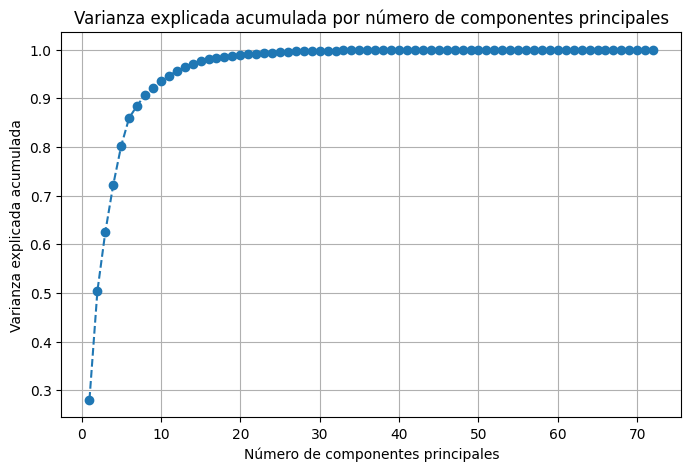

In [99]:
#Calcular la varianza explicada acumulada
data_2=result_df.drop('label', axis=1)
X = StandardScaler().fit_transform(data_2)
pca = PCA()  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

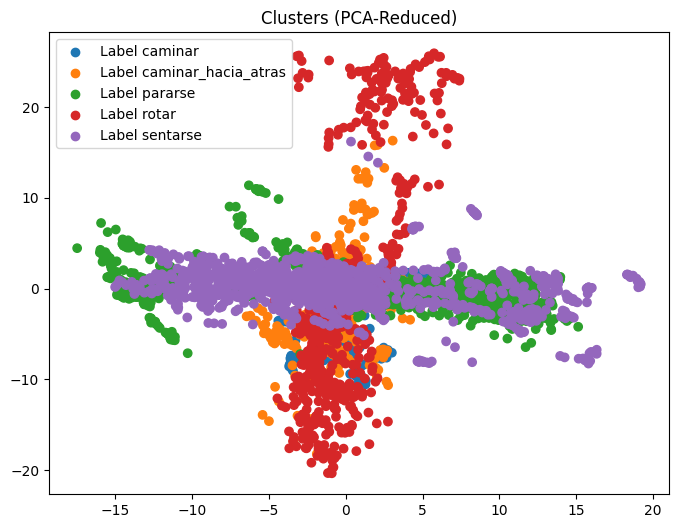

In [100]:
labels = result_df['label']

data_2=result_df.drop('label', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=20)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()

# Modelos

### SVM

In [101]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Separar las características (X) y las etiquetas (y)
X = result_df.drop(columns=['label'])
y = result_df['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear una instancia del modelo SVC
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Entrenar el modelo
svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Evaluar el modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
print('SVM Classification Report:')
print(report_svm)




SVM Accuracy: 0.835143522110163
SVM Classification Report:
                     precision    recall  f1-score   support

            caminar       0.97      0.78      0.87       558
caminar_hacia_atras       0.99      0.87      0.92       434
            pararse       0.90      0.65      0.75       554
              rotar       0.98      0.91      0.95       197
           sentarse       0.69      0.96      0.80       835

           accuracy                           0.84      2578
          macro avg       0.90      0.83      0.86      2578
       weighted avg       0.87      0.84      0.84      2578



### Gridsearch SVM

In [102]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Separar las características (X) y las etiquetas (y)
X = result_df.drop(columns=['label'])
y = result_df['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear una instancia del modelo SVC
svm_model = SVC(random_state=42)

# Definir los parámetros para el GridSearch con opciones menos amplias
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_    

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Mejores parámetros: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9181536074476339
Classification Report:
                     precision    recall  f1-score   support

            caminar       0.99      0.88      0.93       558
caminar_hacia_atras       0.99      0.98      0.98       434
            pararse       0.91      0.83      0.87       554
              rotar       0.97      0.99      0.98       197
           sentarse       0.84      0.95      0.89       835

           accuracy                           0.92      2578
          macro avg       0.94      0.93      0.93      2578
       weighted avg       0.92      0.92      0.92      2578



### RandomForest

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Separar las características (X) y las etiquetas (y)
X = result_df.drop(columns=['label'])
y = result_df['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear una instancia del modelo RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f'RandomForestClassifier Accuracy: {accuracy_rf}')
print('RandomForestClassifier Classification Report:')
print(report_rf)

RandomForestClassifier Accuracy: 0.9014740108611327
RandomForestClassifier Classification Report:
                     precision    recall  f1-score   support

            caminar       0.96      0.87      0.91       558
caminar_hacia_atras       0.99      0.94      0.96       434
            pararse       0.91      0.82      0.86       554
              rotar       0.99      0.93      0.96       197
           sentarse       0.82      0.95      0.88       835

           accuracy                           0.90      2578
          macro avg       0.93      0.90      0.91      2578
       weighted avg       0.91      0.90      0.90      2578



### Gridsearch RandomForest

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Separar las características (X) y las etiquetas (y)
X = result_df.drop(columns=['label'])
y = result_df['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear una instancia del modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Definir los parámetros para el GridSearch con opciones menos amplias
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Mejores parámetros: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9224204809930179
Classification Report:
                     precision    recall  f1-score   support

            caminar       0.97      0.87      0.92       558
caminar_hacia_atras       0.99      0.97      0.98       434
            pararse       0.92      0.86      0.89       554
              rotar       0.99      0.95      0.97       197
           sentarse       0.86      0.96      0.91       835

           accuracy                           0.92      2578
          macro avg       0.94      0.92      0.93      2578
       weighted avg       0.93      0.92      0.92      2578



### XGBoost

In [105]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Separar las características (X) y las etiquetas (y)
X = result_df.drop(columns=['label'])
y = result_df['label']

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Crear una instancia del modelo XGBClassifier
model = xgb.XGBClassifier(
    eval_metric='mlogloss',
    n_estimators=100,  # Número de árboles
    max_depth=6,  # Profundidad máxima de los árboles
    scale_pos_weight=1,
    learning_rate=0.1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

c:\Users\Brayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:14:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9821567106283942
Classification Report:
                     precision    recall  f1-score   support

            caminar       0.99      0.99      0.99       558
caminar_hacia_atras       1.00      0.99      0.99       434
            pararse       0.98      0.97      0.97       554
              rotar       0.99      0.99      0.99       197
           sentarse       0.97      0.98      0.98       835

           accuracy                           0.98      2578
          macro avg       0.99      0.98      0.98      2578
       weighted avg       0.98      0.98      0.98      2578



### Gridsearch XGBoost

In [106]:

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Separar las características (X) y las etiquetas (y)
X = result_df.drop(columns=['label'])
y = result_df['label']

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Crear una instancia del modelo XGBClassifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Definir los parámetros para el GridSearch con opciones menos amplias
param_grid = {
    'n_estimators': [200],
    'max_depth': [9],
    'scale_pos_weight': [1, 1.5, 2, 2.5],
    'learning_rate': [0.01, 0.05, 0.1, 0.15]
}

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\Brayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:17:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores parámetros: {'learning_rate': 0.15, 'max_depth': 9, 'n_estimators': 200, 'scale_pos_weight': 1}
Accuracy: 0.9887509697439876
Classification Report:
                     precision    recall  f1-score   support

            caminar       1.00      0.99      0.99       558
caminar_hacia_atras       1.00      0.99      0.99       434
            pararse       0.98      0.99      0.98       554
              rotar       0.98      0.99      0.99       197
           sentarse       0.98      0.99      0.99       835

           accuracy                           0.99      2578
          macro avg       0.99      0.99      0.99      2578
       weighted avg       0.99      0.99      0.99      2578



### XGBOOST GOOD


In [107]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Separar las características (X) y las etiquetas (y)
X = result_df.drop(columns=['label'])
y = result_df['label']

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Crear una instancia del modelo XGBClassifier
model = xgb.XGBClassifier(
    eval_metric='mlogloss',
    n_estimators=200,  # Número de árboles
    max_depth=9,  # Profundidad máxima de los árboles
    scale_pos_weight=1,
    learning_rate=0.15)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Calcular el porcentaje de confianza de las predicciones
confidence_scores = np.max(y_pred_proba, axis=1) * 100

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Mostrar el porcentaje de confianza de las primeras 10 predicciones
for i in range(10):
    print(f'Predicción: {label_encoder.inverse_transform([y_pred[i]])[0]}, Confianza: {confidence_scores[i]:.2f}%')

c:\Users\Brayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:17:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9887509697439876
Classification Report:
                     precision    recall  f1-score   support

            caminar       1.00      0.99      0.99       558
caminar_hacia_atras       1.00      0.99      0.99       434
            pararse       0.98      0.99      0.98       554
              rotar       0.98      0.99      0.99       197
           sentarse       0.98      0.99      0.99       835

           accuracy                           0.99      2578
          macro avg       0.99      0.99      0.99      2578
       weighted avg       0.99      0.99      0.99      2578

Predicción: caminar, Confianza: 99.97%
Predicción: caminar, Confianza: 99.94%
Predicción: caminar, Confianza: 99.95%
Predicción: pararse, Confianza: 99.73%
Predicción: pararse, Confianza: 99.88%
Predicción: pararse, Confianza: 83.95%
Predicción: sentarse, Confianza: 99.97%
Predicción: pararse, Confianza: 99.74%
Predicción: caminar, Confianza: 99.62%
Predicción: sentarse, Confianza: 99.94%


## Exportar modelo

In [108]:
# Install joblib package
%pip install joblib

import joblib

# Guardar el modelo entrenado y el codificador de etiquetas
joblib.dump(model, "modelo_xgb.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")  # Guardar el codificador de etiquetas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


['label_encoder.pkl']